Group 3: June to September

Jammu & Kashmir, Himachal Pradesh, Haryana, Punjab, Jharkhand, Rajasthan, Uttarakhand, Chhattisgarh

In [10]:
import pandas as pd
import plotly.graph_objects as go

s = ['Jammu & Kashmir', 'Himachal Pradesh', 'Haryana', 'Punjab', 'Jharkhand', 'Rajasthan', 'Uttarakhand', 'Chhattisgarh']

for st in s:
    df = pd.read_csv('../states/'+ st+'.csv')
    districts = sorted(df['District'].unique())
    print(st)
    print(districts)
    fig = go.Figure()

    # Read the dataset and add traces
    for i in districts:
        data = pd.read_csv('../districts/'+i+'.csv',parse_dates= True)
        data = data.sort_values(by="Date", ascending=True)
        yearly_sum = data.groupby('Year')['Avg_rainfall'].sum()
        fig.add_trace(go.Scatter(x=yearly_sum.index, y=yearly_sum.values, mode='lines+markers', name=i, visible='legendonly'))
    

    years = list(range(int(min(yearly_sum.index)), int(max(yearly_sum.index)) + 1, 1))  # Adjust the range and step as needed1
    fig.update_xaxes(tickmode='array', tickvals=years, ticktext=years)

    # Update layout
    fig.update_layout(
        title=st,
        xaxis=dict(title='Year', showgrid=True, gridwidth=1, gridcolor='lightgray'),
        yaxis=dict(title='Average Rainfall in mm', showgrid=True, gridwidth=1, gridcolor='lightgray'),
        legend=dict(x=1.05, y=1, traceorder='normal'),
        margin=dict(l=0, r=0, t=50, b=0),
        plot_bgcolor='white'
    )
    fig.update_layout(
        legend=dict(
            tracegroupgap=0,
        ),
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(label="All",
                        method="update",
                        args=[{"visible": [True] * len(districts)},
                            {"title": "All Districts"}]),
                    dict(label="None",
                        method="update",
                        args=[{"visible": [False] * len(districts)},
                            {"title": "No District"}])
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.05,
                xanchor="left",
                y=1.15,
                yanchor="top"
            ),
        ]
    )

    def create_legend_callback(index):
        def callback(trace, points, selector):
            for i in range(len(fig.data)):
                if i == index:
                    fig.data[i].visible = True
                else:
                    fig.data[i].visible = False
        return callback

    for i, _ in enumerate(fig.data):
        fig.data[i].on_click(create_legend_callback(i))



    fig.show()


Jammu & Kashmir
['Anantnag', 'Bandipora', 'Baramulla', 'Budgam', 'Doda', 'Ganderbal', 'Jammu', 'Kathua', 'Kishtwar', 'Kulgam', 'Kupwara', 'Mirpur', 'Muzaffarabad', 'Poonch', 'Pulwama', 'Rajouri', 'Ramban', 'Reasi', 'Samba', 'Shopian', 'Srinagar', 'Udhampur']


Himachal Pradesh
['Bilaspur', 'Chamba', 'Hamirpur', 'Kangra', 'Kinnaur', 'Kullu', 'Lahul & Spiti', 'Mandi', 'Shimla', 'Sirmaur', 'Solan', 'Una']


Haryana
['Ambala', 'Bhiwani', 'Charki Dadri', 'Faridabad', 'Fatehabad', 'Gurugram', 'Hisar', 'Jhajjar', 'Jind', 'Kaithal', 'Karnal', 'Kurukshetra', 'Mahendragarh', 'Nuh', 'Palwal', 'Panchkula', 'Panipat', 'Rewari', 'Rohtak', 'Sirsa', 'Sonipat', 'Yamunanagar']


Punjab
['Amritsar', 'Barnala', 'Bathinda', 'Faridkot', 'Fatehgarh Sahib', 'Fazilka', 'Firozepur', 'Gurdaspur', 'Hoshiarpur', 'Jalandhar', 'Kapurthala', 'Ludhiana', 'Mansa', 'Moga', 'Pathankot', 'Patiala', 'Rupnagar', 'S.A.S Nagar', 'Sangrur', 'Shahid Bhagat Singh Nagar', 'Sri Muktsar Sahib', 'Tarn Taran']


Jharkhand
['Bokaro', 'Chatra', 'Deoghar', 'Dhanbad', 'Dumka', 'East Singhbum', 'Garhwa', 'Giridih', 'Godda', 'Gumla', 'Hazaribagh', 'Jamtara', 'Khunti', 'Koderma', 'Latehar', 'Lohardaga', 'Pakur', 'Palamu', 'Ramgarh', 'Ranchi', 'Sahebganj', 'Saraikela Kharsawan', 'Simdega', 'West Singhbhum']


Rajasthan
['Ajmer', 'Alwar', 'Banswara', 'Baran', 'Barmer', 'Bharatpur', 'Bhilwara', 'Bikaner', 'Bundi', 'Chittorgarh', 'Churu', 'Dausa', 'Dholpur', 'Dungarpur', 'Ganganagar', 'Hanumangarh', 'Jaipur', 'Jaisalmer', 'Jalore', 'Jhalawar', 'Jhunjhunu', 'Jodhpur', 'Karauli', 'Kota', 'Nagaur', 'Pali', 'Pratapgarh', 'Rajsamand', 'Sawai Madhopur', 'Sikar', 'Sirohi', 'Tonk', 'Udaipur']


Uttarakhand
['Almora', 'Bageshwar', 'Chamoli', 'Champawat', 'Dehradun', 'Haridwar', 'Nainital', 'Pauri Garhwal', 'Pithoragarh', 'Rudra Prayag', 'Tehri Garhwal', 'Udam Singh Nagar', 'Uttar Kashi']


Chhattisgarh
['Balod', 'Baloda Bazar', 'Balrampur', 'Bastar', 'Bemetara', 'Bijapur', 'Bilaspur', 'Dantewada', 'Dhamtari', 'Durg', 'Gariyaband', 'Gaurella Pendra Marwahi', 'Janjgir-Champa', 'Jashpur', 'Kabirdham', 'Kanker', 'Kondagaon', 'Korba', 'Korea', 'Mahasamund', 'Mungeli', 'Narayanpur', 'Raigarh', 'Raipur', 'Rajnandgaon', 'Sukma', 'Surajpur', 'Surguja']


Uttar Pradesh
['Agra', 'Aligarh', 'Ambedkar Nagar', 'Amethi', 'Amroha', 'Auraiya', 'Ayodhya', 'Azamgarh', 'Baghpat', 'Bahraich', 'Ballia', 'Balrampur', 'Banda', 'Barabanki', 'Bareilly', 'Basti', 'Bhadohi', 'Bijnor', 'Budaun', 'Bulandshahr', 'Chandauli', 'Chitrakoot', 'Deoria', 'Etah', 'Etawah', 'Farrukhabad', 'Fatehpur', 'Firozabad', 'Gautam Buddha Nagar', 'Ghaziabad', 'Ghazipur', 'Gonda', 'Gorakhpur', 'Hamirpur', 'Hapur', 'Hardoi', 'Hathras', 'Jalaun', 'Jaunpur', 'Jhansi', 'Kannauj', 'Kanpur Dehat', 'Kanpur Nagar', 'Kasganj', 'Kaushambi', 'Kheri', 'Kushi Nagar', 'Lalitpur', 'Lucknow', 'Maharajganj', 'Mahoba', 'Mainpuri', 'Mathura', 'Mau', 'Meerut', 'Mirzapur', 'Moradabad', 'Muzaffarnagar', 'Pilibhit', 'Pratapgarh', 'Prayagraj', 'Rae Bareli', 'Rampur', 'Saharanpur', 'Sambhal', 'Sant Kabeer Nagar', 'Shahjahanpur', 'Shamli', 'Shravasti', 'Siddharth Nagar', 'Sitapur', 'Sonbhadra', 'Sultanpur', 'Unnao', 'Varanasi']


Combined Plot

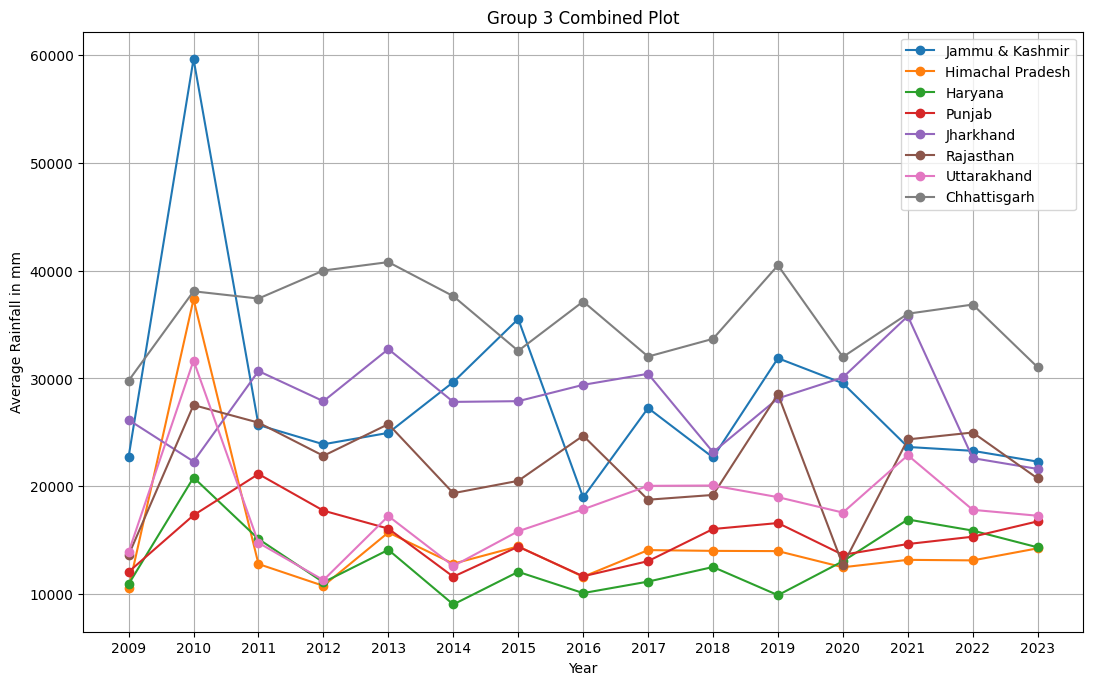

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6), dpi = 100)
ax = fig.add_axes([0,0,1,1])
states = ['Jammu & Kashmir', 'Himachal Pradesh', 'Haryana', 'Punjab', 'Jharkhand', 'Rajasthan', 'Uttarakhand', 'Chhattisgarh']

fy= []
# Read the dataset
for i in states:
    data = pd.read_csv('../states_cumulative/'+i+'.csv',parse_dates= True)
    data = data.sort_values(by="Date", ascending=True)
    yearly_sum = data.groupby('Year')['Average'].sum()
    plt.plot(yearly_sum.index, yearly_sum.values, marker='o', linestyle='-', label = i)
    plt.xticks(yearly_sum.index)
    if i == 'Madhya Pradesh':
        for year in fy:
            if year in yearly_sum.index:
                index = yearly_sum.index.get_loc(year)
                plt.plot(yearly_sum.index[index], yearly_sum.values[index], marker = 'o', markersize = 10, color = 'red')
ax.set_xlabel('Year')
ax.set_ylabel('Average Rainfall in mm')
ax.grid(True)
ax.set_title('Group 3 Combined Plot')
ax.legend()
